# 1 Intro of backtrader 
## 1.1 Pipeline
+ Create a Strategy
+ Create a Cerebro Engine
    + Inject the Strategy 
    + Load and Inject a Data Feed: `cerebro.adddata()`
    + And execute `cerebro.run()`
    + For visual feedback use: `cerebro.plot()`
    
## 1.2 SMA Crossover Strategy
### 1.2.1 Plotting with backtrader

Starting Portfolio Value: 10000.00
Final Portfolio Value: 10973.26


<IPython.core.display.Javascript object>


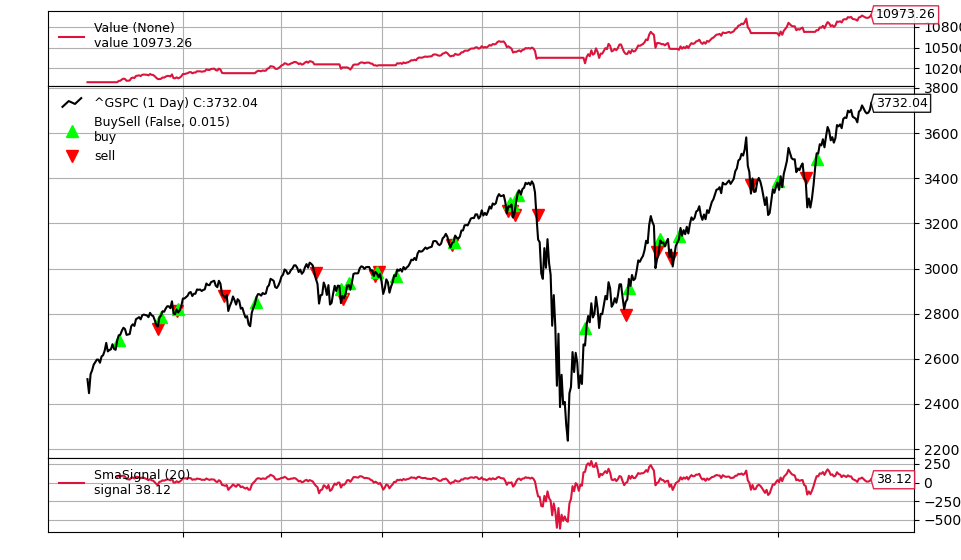

[[<Figure size 640x480 with 3 Axes>]]

In [1]:
from datetime import datetime
import backtrader as bt
class SmaSignal(bt.Signal):
    params = (('period', 20), )
    def __init__(self):
        self.lines.signal = self.data - bt.ind.SMA(period=self.p.period)
data = bt.feeds.YahooFinanceData(dataname='^GSPC', fromdate=datetime(2019, 1, 1), todate=datetime(2020, 12, 31))
cerebro = bt.Cerebro(stdstats = False)
cerebro.adddata(data)
cerebro.broker.setcash(1e4)
cerebro.add_signal(bt.SIGNAL_LONG, SmaSignal)
cerebro.addobserver(bt.observers.BuySell)
cerebro.addobserver(bt.observers.Value)
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.plot(iplot=True, volume=False)

### 1.2.2 Plotting with pyfolio

In [2]:
class SmaStrategy(bt.Strategy):
    params = (('ma_period', 20), )
    def __init__(self):
        self.data_close = self.datas[0].close
        self.sma = bt.ind.SMA(self.datas[0],period=self.params.ma_period)
    
    def next(self):
        if self.position.size:
            if self.data_close[0] < self.sma[0]:
                self.sell()
        elif self.data_close[0] > self.sma[0]:
            self.buy()

In [3]:
cerebro = bt.Cerebro()
cerebro.adddata(data)
# strategy
cerebro.addstrategy(SmaStrategy)
# Analyzer
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')
results = cerebro.run()
strat = results[0]
pyfoliozer = strat.analyzers.getbyname('pyfolio')
returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()
# pyfolio showtime
import pyfolio as pf
pf.create_full_tear_sheet(
    returns,
    positions=positions,
    transactions=transactions,
    live_start_date='2020-01-01'
)

c:\users\student\appdata\local\programs\python\python39\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,3.01,2020-01-17,2020-04-07,2020-06-03,99
1,2.42,2020-06-08,2020-07-02,2020-08-18,52
2,2.26,2020-09-02,2020-10-02,2020-12-04,68
3,1.17,2019-07-26,2019-09-03,2019-10-28,67
4,0.72,2019-03-01,2019-03-08,2019-04-03,24


c:\users\student\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\student\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexes\base.py:5277: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  start_slice, end_slice = self.slice_locs(start, end, step=step, kind=kind)


Stress Events,mean,min,max
New Normal,0.02%,-1.76%,0.88%


Top 10 long positions of all time,max
^GSPC,34.03%


Top 10 short positions of all time,max


Top 10 positions of all time,max
^GSPC,34.03%


c:\users\student\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [4]:
pf.create_simple_tear_sheet(
    returns,
    positions=positions,
    transactions=transactions
)

Start date,2019-01-02
End date,2020-12-30
Total months,24
,Backtest
Annual return,4.8%
Cumulative returns,9.7%
Annual volatility,3.8%
Sharpe ratio,1.25
Calmar ratio,1.58
Stability,0.92
Max drawdown,-3.0%


## 1.3 Exercise: Create a Dual MA Crossover Strategy

In [5]:
class DmaStrategy(bt.Strategy):
    params = (('fast', 50), ('slow', 200))
    def __init__(self):
        self.sma_fast = bt.ind.SMA(self.datas[0],period=self.params.fast)
        self.sma_slow = bt.ind.SMA(self.datas[0],period=self.params.slow)
    
    def next(self):
        if self.position.size:
            if self.sma_fast[0] < self.sma_slow[0]:
                self.sell()
        elif self.sma_fast[0] > self.sma_slow[0]:
            self.buy()


In [6]:
data1 = bt.feeds.YahooFinanceData(dataname='^GSPC', fromdate=datetime(2000, 1, 1), todate=datetime(2020, 12, 31))
cerebro = bt.Cerebro()
cerebro.adddata(data1)
# strategy
cerebro.addstrategy(DmaStrategy)
# Analyzer
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')
results = cerebro.run()
strat = results[0]
pyfoliozer = strat.analyzers.getbyname('pyfolio')
returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()
# pyfolio showtime
import pyfolio as pf
pf.create_simple_tear_sheet(
    returns,
    positions=positions,
    transactions=transactions,
    live_start_date='2019-01-01'
)